# Importing the required Libraries

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math

# Loading the datasets

In [137]:
customer=pd.read_csv('customer_purchases.csv')
browser=pd.read_csv('customer_browsing.csv')

# Data Wrangling

In [138]:
customer.sample(5)

,Customer_id,Customer_name,Product_id,Product_price,Product_category,Total_transactions,Age,Salary,Region,Gender,Relationship_status,Family_members,Purchase_date
4263,CUST00480,Customer_480,PROD6145,273.92,Gaming,12,38,68541,South,Female,Single,1,2025-07-30
167,CUST00017,Customer_17,PROD1836,1511.03,Jewelry,10,62,84240,North,Male,Married,2,2025-07-21
24944,CUST02818,Customer_2818,PROD6907,441.51,Sports,11,27,64451,West,Female,Divorced,4,2025-07-20
8534,CUST00964,Customer_964,PROD7242,249.58,Sports,5,25,53134,West,Female,Divorced,2,2025-09-07
22676,CUST02567,Customer_2567,PROD7762,328.35,Sports,4,29,43992,North,Female,Divorced,1,2025-08-11


In [139]:
browser.sample(5)

,Customer_id,PLP_browse_time,Browsing_date,CTR,Total_clicks
34999,CUST02549,12.31,2025-08-25,0.14,18
34218,CUST02491,13.53,2025-08-29,0.20,28
2791,CUST00200,14.40,2025-08-11,0.20,30
18142,CUST01317,9.73,2025-08-15,0.10,10
30282,CUST02198,16.77,2025-08-05,0.11,18


### Looking for null values

In [140]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26556 entries, 0 to 26555
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_id          26556 non-null  object 
 1   Customer_name        26556 non-null  object 
 2   Product_id           26556 non-null  object 
 3   Product_price        26556 non-null  float64
 4   Product_category     26556 non-null  object 
 5   Total_transactions   26556 non-null  int64  
 6   Age                  26556 non-null  int64  
 7   Salary               26556 non-null  int64  
 8   Region               26556 non-null  object 
 9   Gender               26556 non-null  object 
 10  Relationship_status  26556 non-null  object 
 11  Family_members       26556 non-null  int64  
 12  Purchase_date        26556 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 2.6+ MB


Customer_id: Unique identifier assigned to each customer.

Customer_name: Pseudonymized or anonymized customer label for reference (not necessarily the actual name).

Product_id: Unique identifier for the purchased product.

Product_price: Price (in US Dollars) of the purchased product.

Product_category: Category or type of the product (e.g., Designer Wear, Electronics, etc.).

Total_transactions: Total number of purchases or transactions made by the customer in two months

Age: Age of the customer (in years).

Salary: Annual income/salary of the customer (numerical, in US Dollars).

Region: Geographic region where the customer resides (e.g.North, South, Central, East, West).

Gender: Gender of the customer (e.g., Male, Female, Other).

Relationship_status: Marital/relationship status of the customer (e.g., Single, Married, Divorsed).

Family_members: Number of family members associated with the customer (can indicate household size).

Purchase_date: Date on which the transaction/purchase was made.

In [141]:
browser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41285 entries, 0 to 41284
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer_id      41285 non-null  object 
 1   PLP_browse_time  41285 non-null  float64
 2   Browsing_date    41285 non-null  object 
 3   CTR              41285 non-null  float64
 4   Total_clicks     41285 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 1.6+ MB


Customer_id: Unique identifier assigned to each customer.

PLP_browse_time: Time (in minutes) spent by the customer browsing the Product Listing Page (PLP) during a session.

Browsing_date: Date on which the browsing activity was recorded. Not every browsing session is converted to purchase. Browsing_date from last two months.

CTR: Click-through rate, calculated as the ratio of clicks to impressions (expressed as a decimal or percentage).

Total_clicks: Total number of clicks made by the customer during the browsing session.

## Description

In [142]:
customer.describe()

,Product_price,Total_transactions,Age,Salary,Family_members
count,26556.000000,26556.000000,26556.000000,26556.000000,26556.000000
mean,470.531563,9.684214,45.843275,74262.799932,2.837400
std,420.938135,2.561228,14.702328,12356.914431,1.628566
min,7.530000,1.000000,18.000000,22533.000000,1.000000
25%,222.350000,8.000000,34.000000,65892.000000,2.000000
50%,343.770000,10.000000,47.000000,74504.000000,2.000000
75%,465.465000,11.000000,59.000000,82601.000000,4.000000
max,1999.980000,20.000000,69.000000,114147.000000,6.000000


In [143]:
browser.describe()

,PLP_browse_time,CTR,Total_clicks
count,41285.000000,41285.000000,41285.000000
mean,9.686531,0.188344,18.880029
std,2.388002,0.056447,7.489412
min,0.330000,0.060000,1.000000
25%,8.100000,0.140000,13.000000
50%,9.700000,0.190000,18.000000
75%,11.300000,0.240000,24.000000
max,18.710000,0.300000,51.000000


## Data cleaning

### Dropping the repeated Product_id from Customer sheet

In [173]:
customer=customer.drop_duplicates(subset='Product_id')
customer.shape

(9070, 14)

In [174]:
customer['Product_price']=customer['Product_price'].astype('int')

In [175]:
customer=customer.reset_index()

### Dropping the index column

In [176]:
customer.drop('index', axis=1, inplace=True)

### Updating the total number of transactions

In [177]:
customer['Total_transactions']=customer.groupby('Customer_id')['Total_transactions'].transform('count')

### Adding a column for total purchase made in two months

In [178]:
customer['Total_purchase']=customer.groupby('Customer_id')['Product_price'].transform('sum')

### Removing white spaces from Customer_name

In [179]:
customer['Customer_name']=customer['Customer_name'].str.strip()

### Removing the rows for extra customers

In [180]:
browser=browser[~((browser['Customer_id']=='CUST02996') | (browser['Customer_id']=='CUST02997') |(browser['Customer_id']=='CUST02998') | (browser['Customer_id']=='CUST02999') | (browser['Customer_id']=='CUST03000'))]

### Total rows in customer

In [181]:
customer.shape

(9070, 14)

### Total rows in browser

In [182]:
browser.shape

(41216, 5)

# Data Visualization

## Analysis on Customer Purchase dataset

### Distribution of customers with age

<Axes: xlabel='Age', ylabel='Count'>

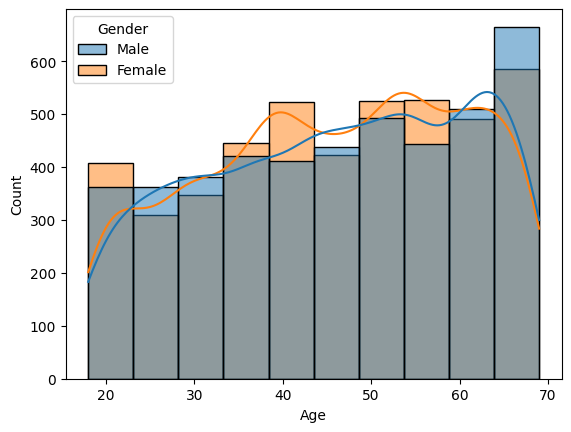

In [197]:
sns.histplot(data=customer, x='Age', hue='Gender', kde=True, bins=10)

### Distribution of customers with salary

<Axes: xlabel='Salary', ylabel='Count'>

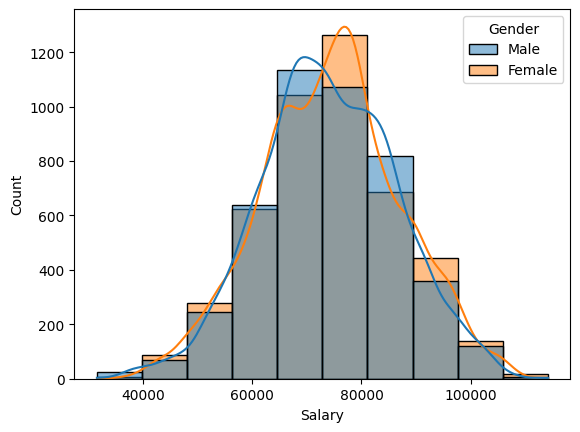

In [338]:
sns.histplot(data=customer, x='Salary', hue='Gender', kde=True, bins=10)

### Distributin of number of sales made in each region

([<matplotlib.patches.Wedge at 0x1ff358bdbd0>,
 [Text(0.8806472191276554, 0.659136158500448, 'Central'),
  Text(-0.3898736828744477, 1.028590546039538, 'East'),
  Text(-1.0975683946529677, -0.07310006196240318, 'North'),
  Text(-0.3199278238393192, -1.0524477124938025, 'South'),
  Text(0.8811037231492664, -0.6585257998381695, 'West')],
 [Text(0.48035302861508467, 0.35952881372751705, '20.45%'),
  Text(-0.21265837247697145, 0.5610493887488388, '20.63%'),
  Text(-0.5986736698107097, -0.039872761070401726, '19.96%'),
  Text(-0.17450608573053775, -0.5740623886329832, '18.53%'),
  Text(0.48060203080869074, -0.35919589082081965, '20.43%')])

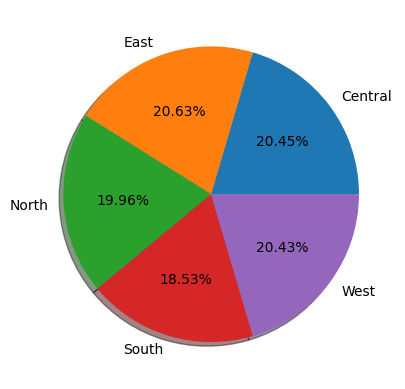

In [198]:
region_list=customer.groupby('Region')['Customer_id'].count().reset_index()
plt.pie(region_list['Customer_id'], labels=region_list['Region'], shadow=True, autopct='%0.2f%%')

### Distribution of total sales made in each region

<Axes: xlabel='Region', ylabel='Product_price'>

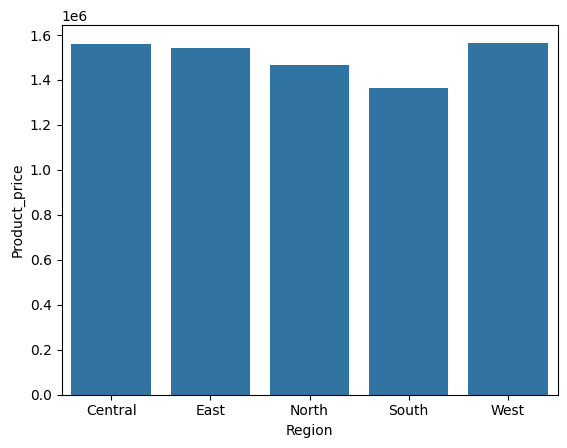

In [253]:
region_list_price=customer.groupby('Region')['Product_price'].sum().reset_index()
sns.barplot(data=region_list_price, x='Region', y='Product_price')

### Distribution of number of Sales made with members in family

<Axes: xlabel='Family_members', ylabel='count'>

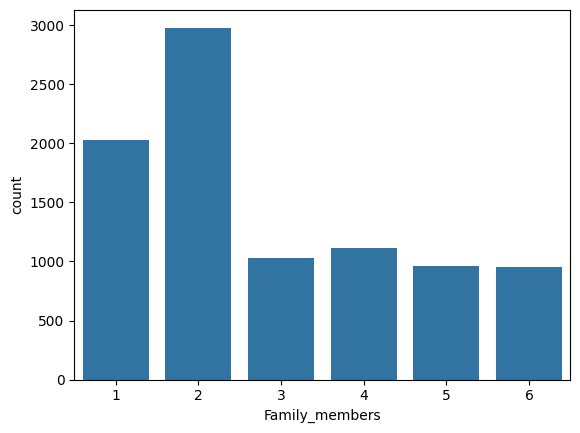

In [254]:
family_members_list=customer.groupby('Family_members')['Customer_id'].count().reset_index()
family_members_list.rename(columns={'Customer_id': 'count'}, inplace=True)
sns.barplot(data=family_members_list, x="Family_members", y="count")

### Distribution of Total purchase made with numbers of members in family

<Axes: xlabel='Family_members', ylabel='Total_purchase'>

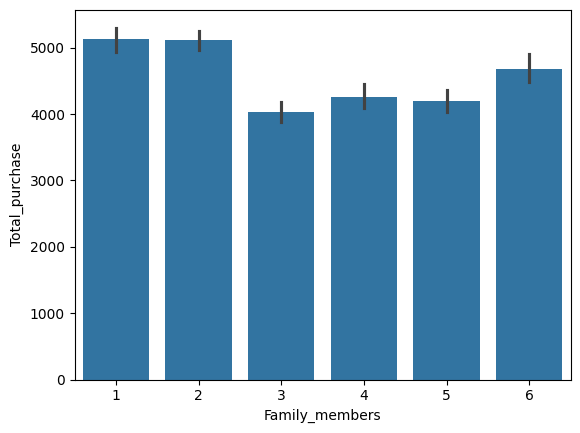

In [345]:
sns.barplot(data=customer, x='Family_members', y='Total_purchase')

### Distribution of number of transactions with the relationship status

([<matplotlib.patches.Wedge at 0x1ff69b11d10>,
 [Text(1.0417200618503337, 0.3532977678085965, 'Divorced'),
  Text(-0.6727818850842466, 0.8702669332466262, 'Married'),
  Text(0.35762505944232204, -1.0402424317719767, 'Single')],
 [Text(0.5682109428274548, 0.19270787335014353, '10.41%'),
  Text(-0.36697193731867994, 0.4746910544981596, '50.13%'),
  Text(0.19506821424126655, -0.5674049627847145, '39.46%')])

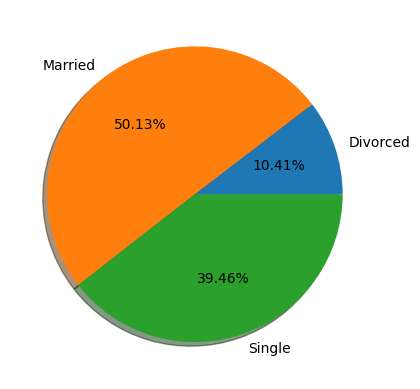

In [255]:
relationship_status=customer.groupby('Relationship_status')['Customer_id'].count().reset_index()
relationship_status.rename(columns={'Customer_id': 'count'}, inplace=True)
plt.pie(relationship_status['count'], labels=relationship_status['Relationship_status'], shadow=True, autopct='%0.2f%%')

### Total value of transaction by each gender

<Axes: xlabel='Gender', ylabel='Product_price'>

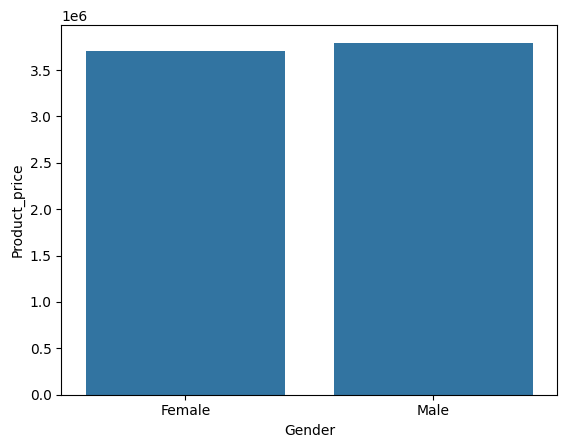

In [259]:
gender_list=customer.groupby('Gender')['Product_price'].sum().reset_index()
sns.barplot(data=gender_list, x='Gender', y='Product_price')

### Distribution of Age with product category

<Axes: xlabel='Age', ylabel='Product_category'>

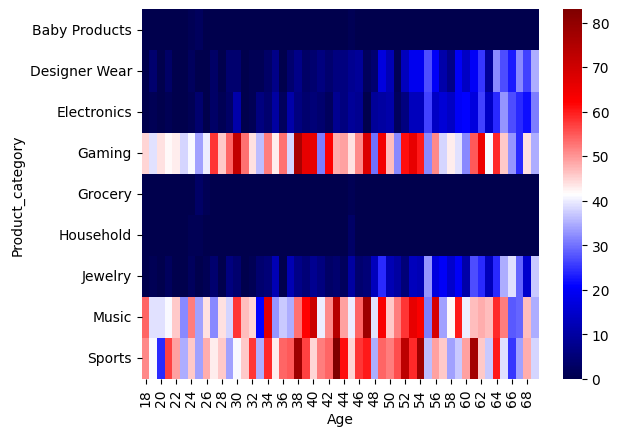

In [307]:
age_vs_category=customer.pivot_table(index='Product_category', columns='Age', values='Customer_id', aggfunc='count').fillna(0)
sns.heatmap(age_vs_category, cmap='seismic')

### Distribution of Relationship status with product category

<Axes: xlabel='Relationship_status', ylabel='Product_category'>

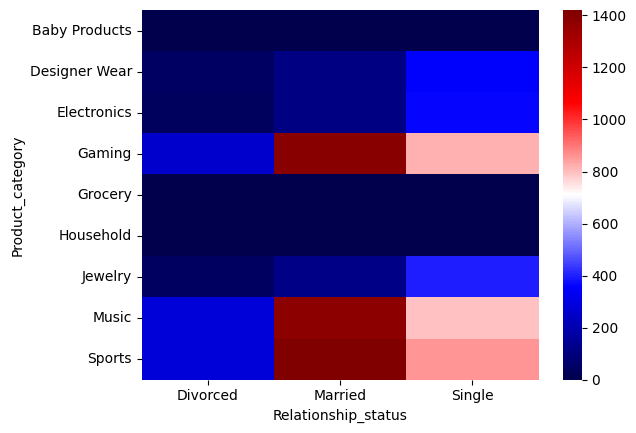

In [287]:
relationship_vs_category=customer.pivot_table(index='Product_category', columns='Relationship_status', values='Customer_id', aggfunc='count').fillna(0)
sns.heatmap(relationship_vs_category, cmap='seismic')

In [276]:
customer.head(3)

,Customer_id,Customer_name,Product_id,Product_category,Total_transactions,Age,Salary,Region,Gender,Relationship_status,Family_members,Purchase_date,Total_purchase,Product_price
0,CUST00001,Customer_1,PROD9628,Gaming,11,56,72497,North,Male,Married,6,2025-07-21,10078,1229
1,CUST00001,Customer_1,PROD3871,Sports,11,56,72497,North,Male,Married,6,2025-08-09,10078,1605
2,CUST00001,Customer_1,PROD8755,Sports,11,56,72497,North,Male,Married,6,2025-09-08,10078,2973


## Multivariate Analysis

### Total transactions made in each category by gender

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Gaming'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Music'),
  Text(3, 0, 'Designer Wear'),
  Text(4, 0, 'Electronics'),
  Text(5, 0, 'Jewelry'),
  Text(6, 0, 'Household'),
  Text(7, 0, 'Baby Products'),
  Text(8, 0, 'Grocery')])

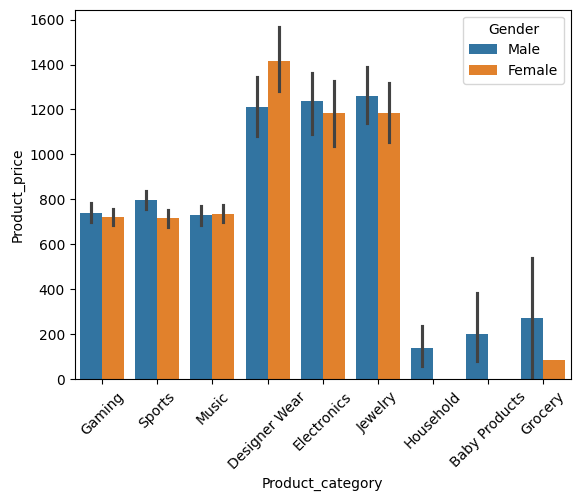

In [262]:
sns.barplot(data=customer, x='Product_category', y='Product_price', hue='Gender' )
plt.xticks(rotation=45)

### Distribution of age and gender with total purchase made

<Axes: xlabel='Age', ylabel='Total_purchase'>

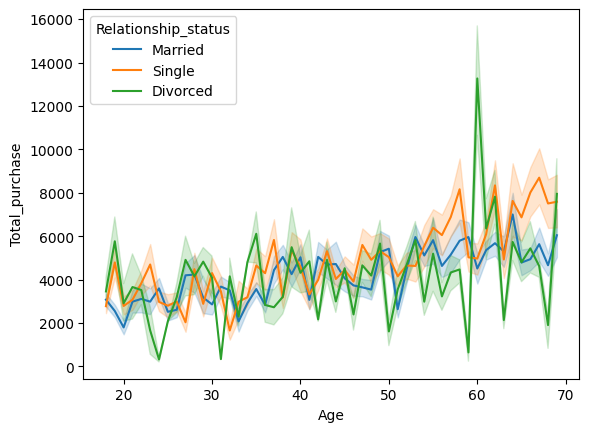

In [337]:
sns.lineplot(data=customer, x='Age', y='Total_purchase', hue='Relationship_status')

### Distribution of Salary with age and gender

<Axes: xlabel='Age', ylabel='Salary'>

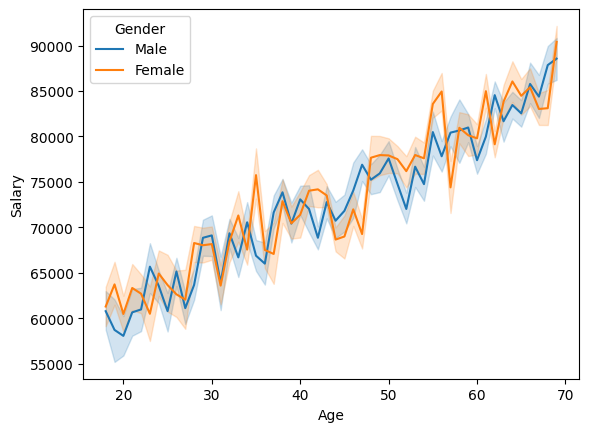

In [274]:
sns.lineplot(data=customer, x='Age', y='Salary', hue='Gender')

### Distribution of Salary and gender with product price

<Axes: xlabel='Salary', ylabel='Product_price'>

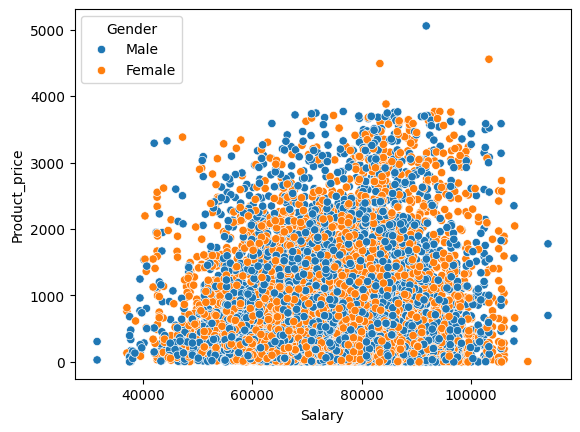

In [275]:
sns.scatterplot(data=customer, x='Salary', y='Product_price', hue='Gender')

In [288]:
customer.head(3)

,Customer_id,Customer_name,Product_id,Product_category,Total_transactions,Age,Salary,Region,Gender,Relationship_status,Family_members,Purchase_date,Total_purchase,Product_price
0,CUST00001,Customer_1,PROD9628,Gaming,11,56,72497,North,Male,Married,6,2025-07-21,10078,1229
1,CUST00001,Customer_1,PROD3871,Sports,11,56,72497,North,Male,Married,6,2025-08-09,10078,1605
2,CUST00001,Customer_1,PROD8755,Sports,11,56,72497,North,Male,Married,6,2025-09-08,10078,2973


### Distribution of income and region with respect to product price

<Axes: xlabel='Salary', ylabel='Product_price'>

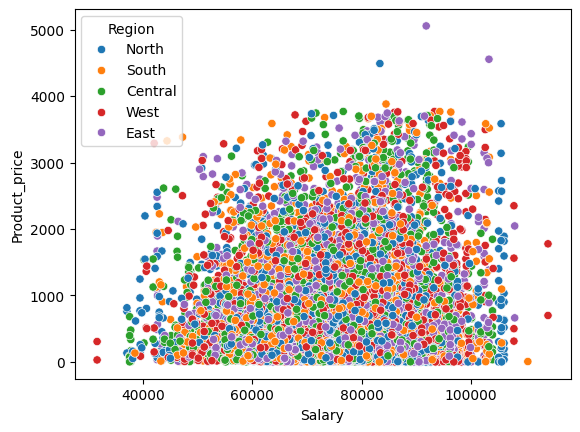

In [290]:
sns.scatterplot(data=customer, x='Salary', y='Product_price', hue='Region')

### Distribution of salary and gender with region

<Axes: xlabel='Region', ylabel='Salary'>

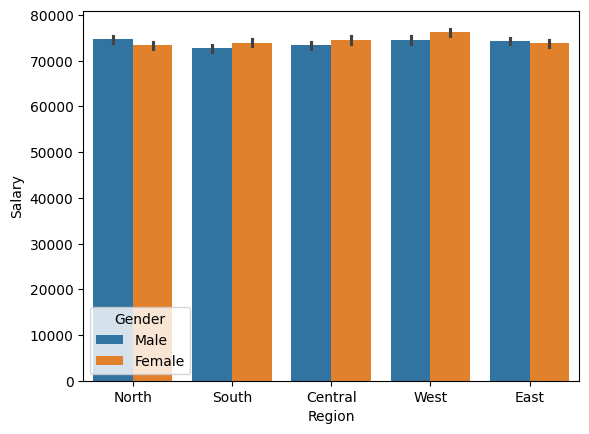

In [294]:
sns.barplot(data=customer, x='Region', y='Salary', hue='Gender')

## Analysis of Customer Browser Dataset

### Distribution of CTR with total clicks

<Axes: xlabel='Total_clicks', ylabel='CTR'>

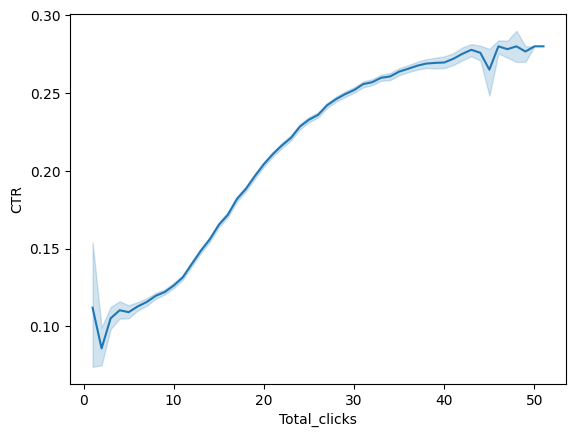

In [298]:
sns.lineplot(data=browser, x='Total_clicks', y='CTR')

### Distribution of Total clicks

<Axes: xlabel='Total_clicks', ylabel='Count'>

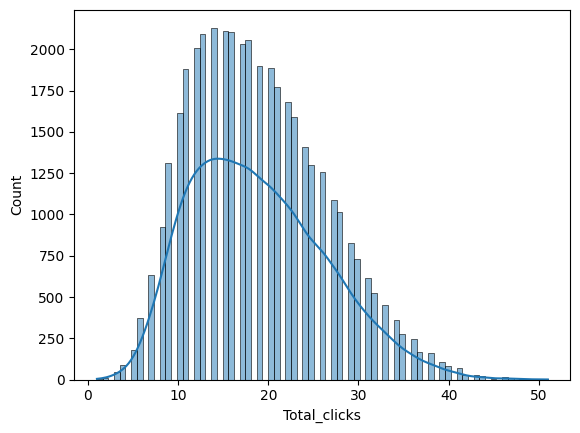

In [341]:
sns.histplot(data=browser, x='Total_clicks', kde=True)

### Distribution of CTR

<Axes: xlabel='CTR', ylabel='Count'>

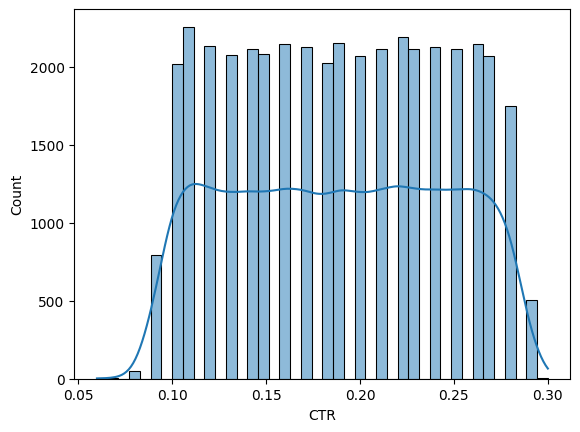

In [343]:
sns.histplot(data=browser, x='CTR', kde=True)

### Distribution of Age with browsing time

In [323]:
merge_dataset=browser.merge(customer, how='left', left_on=['Customer_id', 'Browsing_date'], right_on=['Customer_id', 'Purchase_date']).dropna(how='any').reset_index()
merge_dataset=merge_dataset.drop('index', axis=1)

<Axes: xlabel='Age', ylabel='PLP_browse_time'>

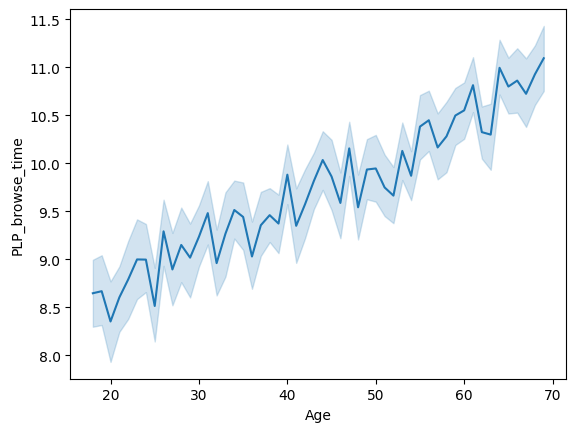

In [348]:
sns.lineplot(data=merge_dataset, x='Age', y='PLP_browse_time')

In [327]:
merge_dataset.head(3)

,Customer_id,PLP_browse_time,Browsing_date,CTR,Total_clicks,Customer_name,Product_id,Product_category,Total_transactions,Age,Salary,Region,Gender,Relationship_status,Family_members,Purchase_date,Total_purchase,Product_price
0,CUST00001,8.07,2025-07-21,0.20,17,Customer_1,PROD9628,Gaming,11.0,56.0,72497.0,North,Male,Married,6.0,2025-07-21,10078.0,1229.0
1,CUST00001,10.24,2025-08-09,0.26,27,Customer_1,PROD3871,Sports,11.0,56.0,72497.0,North,Male,Married,6.0,2025-08-09,10078.0,1605.0
2,CUST00001,10.44,2025-09-08,0.11,12,Customer_1,PROD8755,Sports,11.0,56.0,72497.0,North,Male,Married,6.0,2025-09-08,10078.0,2973.0


### Distribution of Age with CTR

<Axes: xlabel='Age', ylabel='CTR'>

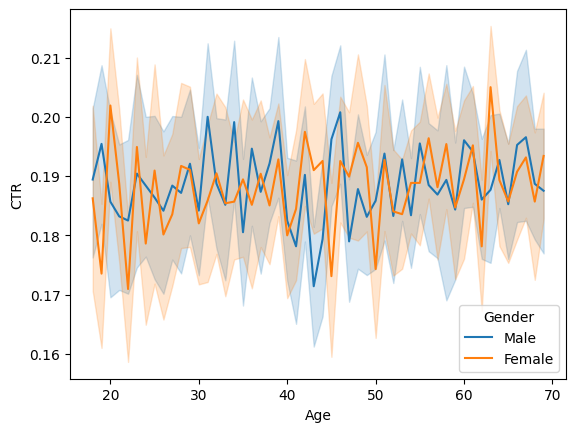

In [346]:
sns.lineplot(data=merge_dataset, x='Age', y='CTR', hue='Gender')

### Distribution of Salary with Salary

<Axes: xlabel='Salary', ylabel='CTR'>

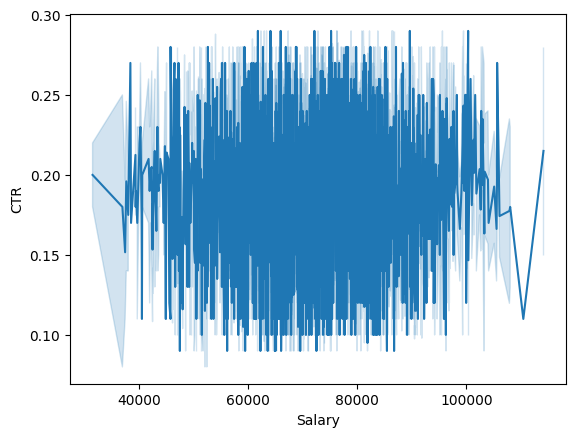

In [344]:
sns.lineplot(data=merge_dataset, x='Salary', y='CTR')